In [3]:
from google.colab import files

# Upload the file from your local machine
uploaded = files.upload()



Saving flights.csv to flights.csv


In [4]:
import pandas as pd

# Assuming the "flights" dataset is already loaded or available for upload
# Read the uploaded file into a Pandas DataFrame
flights_data = pd.read_csv(next(iter(uploaded)), sep=",")

# Display the first few rows of the DataFrame
print(flights_data.head())

# Call shape to identify the rows and columns of the dataset
print('Flights dataset has', flights_data.shape[0], 'rows and', flights_data.shape[1], 'columns')

# Get the list of features (columns)
features_list = flights_data.columns.tolist()
print("List of features:")
print(features_list)

   rownames  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0         1  2013      1    1     517.0             515        2.0     830.0   
1         2  2013      1    1     533.0             529        4.0     850.0   
2         3  2013      1    1     542.0             540        2.0     923.0   
3         4  2013      1    1     544.0             545       -1.0    1004.0   
4         5  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute             time_hour  


In [ ]:
#Check the data for inconsistencies
import pandas as pd

# Check for missing values in each column
missing_values = flights_data.isnull().sum()

# Identify columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index

# Print columns with missing values and their count
for column in columns_with_missing_values:
    print(f"Column '{column}' has {missing_values[column]} missing values.")



Column 'dep_time' has 8255 missing values.
Column 'dep_delay' has 8255 missing values.
Column 'arr_time' has 8713 missing values.
Column 'arr_delay' has 9430 missing values.
Column 'tailnum' has 2512 missing values.
Column 'air_time' has 9430 missing values.


Frequency Table for 'origin' feature:
EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64


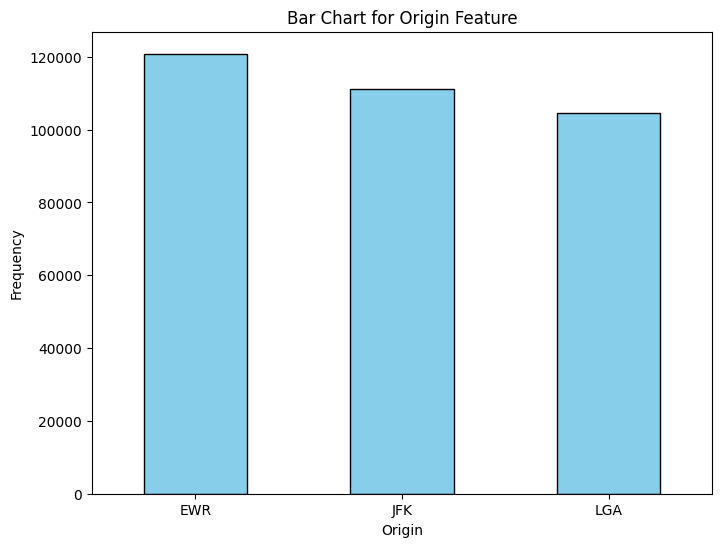

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Frequency table
origin_frequency = flights_data['origin'].value_counts()

# Print frequency table
print("Frequency Table for 'origin' feature:")
print(origin_frequency)

# Bar chart
plt.figure(figsize=(8, 6))
origin_frequency.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Chart for Origin Feature')
plt.xlabel('Origin')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


Explained Variance Ratio:
[4.30654694e-01 2.02936377e-01 1.78932363e-01 9.95369427e-02
 5.17728378e-02 1.84716660e-02 9.19425119e-03 6.79983120e-03
 1.70103703e-03 1.60176652e-32]


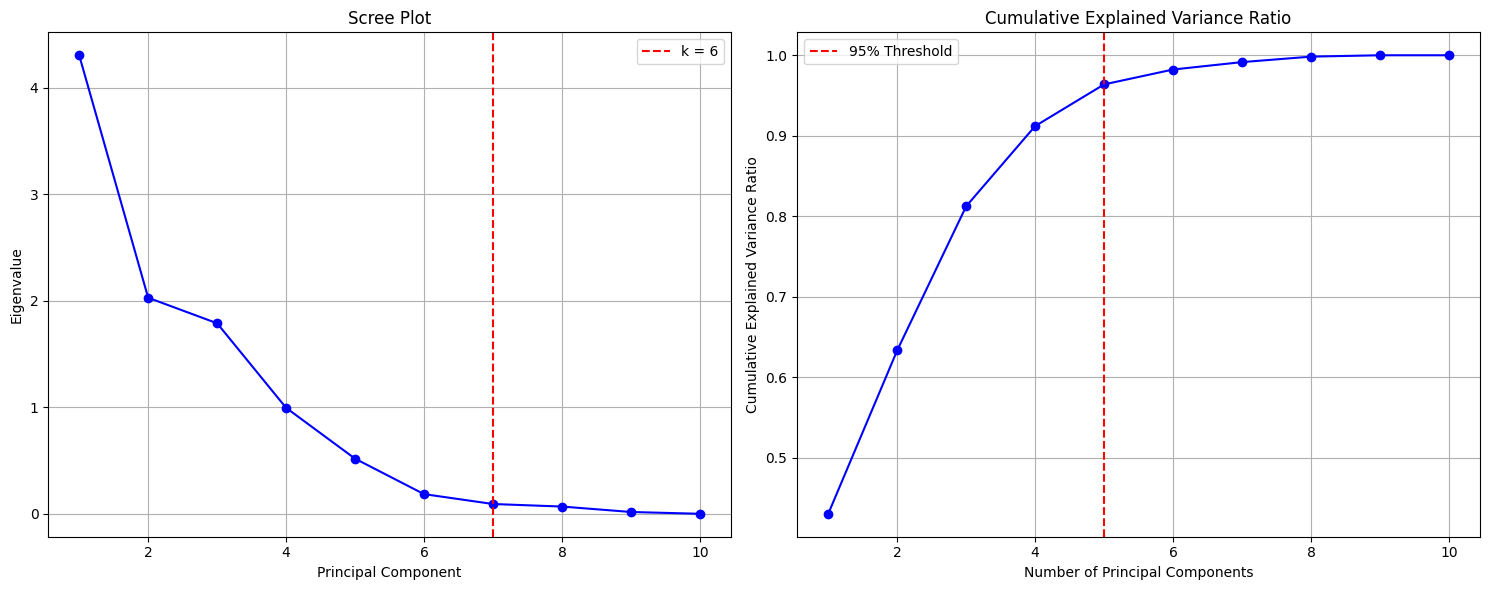

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming the "flights" dataset is already loaded or available for upload
# Assuming the dataset is stored in the variable flights_data

# Extract the features for PCA
features = flights_data[['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
                          'sched_arr_time', 'arr_delay', 'air_time', 'distance',
                          'hour', 'minute']]

# Impute missing values (replace NaNs with the mean of each column)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardize the features
features_standardized = StandardScaler().fit_transform(features_imputed)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_standardized)

# Print explained variance ratio for each principal component
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Get the eigenvalues and explained variance ratios
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.axvline(x=7, color='r', linestyle='--', label='k = 6')  # Vertical line at k = 7
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)

# Cumulative Explained Variance Ratio Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='-', color='b')
threshold_index = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
plt.axvline(x=threshold_index, color='r', linestyle='--', label='95% Threshold')  # Vertical line at threshold
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


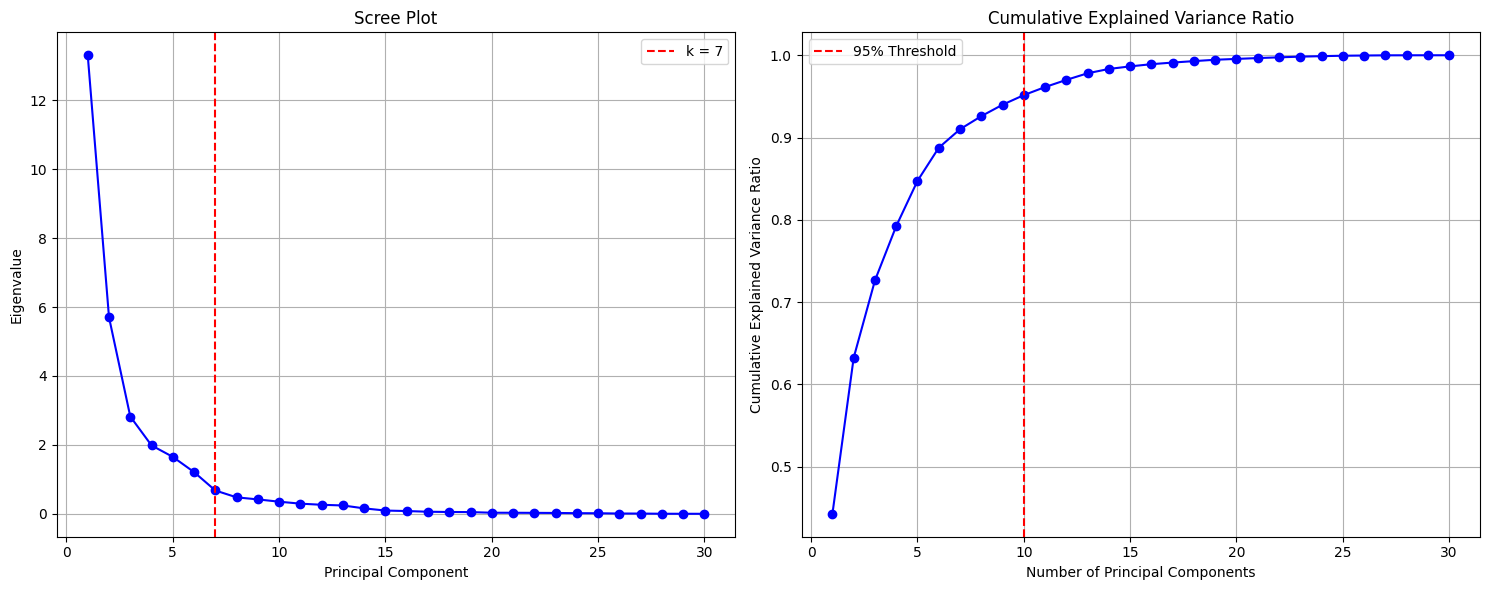

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X_standardized)

# Get the eigenvalues and explained variance ratios
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.axvline(x=7, color='r', linestyle='--', label='k = 7')  # Vertical line at k = 7
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)

# Cumulative Explained Variance Ratio Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='-', color='b')
threshold_index = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
plt.axvline(x=threshold_index, color='r', linestyle='--', label='95% Threshold')  # Vertical line at threshold
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X_standardized)

# Get the coefficients for the first principal component (PC1)
coef_pc1 = pca.components_[0]

# Display the rounded coefficients
print("Coefficients for PC1:")
print(np.round(coef_pc1, 2))

# Construct the equation for PC1
equation_pc1 = "PC1 = "
for i, coef in enumerate(coef_pc1):
    equation_pc1 += f"{np.round(coef, 2)} * X{i+1} + " if i < len(coef_pc1) - 1 else f"{np.round(coef, 2)} * X{i+1}"

# Display the equation for PC1
print("\nEquation for PC1:")
print(equation_pc1)

# Substitute the first samples of each feature into the equation for PC1
first_samples = X_standardized[0, :]
pc1_value = np.dot(first_samples, coef_pc1)

# Display the result
print("\nPC1 Value for the First Sample:")
print(np.round(pc1_value, 4))

# Display the explanation for how the first eigenvalue is computed
print("\nExplanation for Computing the First Eigenvalue:")
print("The first eigenvalue is the amount of variance captured by the first principal component (PC1).")
print("It is obtained from the diagonal element of the covariance matrix of the standardized data.")
print("Mathematically, the first eigenvalue is equal to the square of the length (norm) of the first eigenvector (PC1).")
print(f"First Eigenvalue: {np.round(pca.explained_variance_[0], 4)}")



Coefficients for PC1:
[0.22 0.1  0.23 0.22 0.14 0.24 0.26 0.26 0.14 0.06 0.21 0.02 0.21 0.2
 0.01 0.17 0.15 0.18 0.04 0.1  0.23 0.1  0.24 0.22 0.13 0.21 0.23 0.25
 0.12 0.13]

Equation for PC1:
PC1 = 0.22 * X1 + 0.1 * X2 + 0.23 * X3 + 0.22 * X4 + 0.14 * X5 + 0.24 * X6 + 0.26 * X7 + 0.26 * X8 + 0.14 * X9 + 0.06 * X10 + 0.21 * X11 + 0.02 * X12 + 0.21 * X13 + 0.2 * X14 + 0.01 * X15 + 0.17 * X16 + 0.15 * X17 + 0.18 * X18 + 0.04 * X19 + 0.1 * X20 + 0.23 * X21 + 0.1 * X22 + 0.24 * X23 + 0.22 * X24 + 0.13 * X25 + 0.21 * X26 + 0.23 * X27 + 0.25 * X28 + 0.12 * X29 + 0.13 * X30

PC1 Value for the First Sample:
9.1928

Explanation for Computing the First Eigenvalue:
The first eigenvalue is the amount of variance captured by the first principal component (PC1).
It is obtained from the diagonal element of the covariance matrix of the standardized data.
Mathematically, the first eigenvalue is equal to the square of the length (norm) of the first eigenvector (PC1).
First Eigenvalue: 13.305


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Convert to DataFrame for better visualization (optional)
df = pd.DataFrame(data=np.c_[X_standardized, y], columns=list(breast_cancer.feature_names) + ['target'])

# Calculate the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Display the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Get the coefficients for the first principal component (PC1)
coef_pc1 = eigenvectors[:, 0]

# Display the rounded coefficients for PC1
print("\nCoefficients for PC1:")
print(np.round(coef_pc1, 6))

# Calculate the sum of squares of PC1 coefficients
sum_of_squares = np.sum(coef_pc1**2)

# Number of samples
N = X_standardized.shape[0]

# Calculate the first eigenvalue
eigenvalue = (1 / N) * sum_of_squares

# Display the result
print("\nFirst Eigenvalue:")
print(np.round(eigenvalue, 6))

# Compute the sum of squares for PC1
ss_pc1 = np.sum(principal_components[:, 0]**2)

# Compute the eigenvalue for PC1
eigenvalue_pc1 = ss_pc1 / (X_standardized.shape[0] - 1)

# Display the result
print("Eigenvalue for PC1 (computed):", np.round(eigenvalue_pc1, 4))



Covariance Matrix:
[[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1.1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
feature_names = breast_cancer.feature_names

# Create a DataFrame for the original features
features = pd.DataFrame(X, columns=feature_names)

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame for principal component coefficients
df_comp = pd.DataFrame(pca.components_, index=[f'PC{i+1}' for i in range(pca.n_components_)], columns=features.columns)

# Display the DataFrame
print("DataFrame with Principal Component Coefficients:")
print(df_comp)


DataFrame with Principal Component Coefficients:
      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1      0.218902      0.103725        0.227537   0.220995         0.142590   
PC2     -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
PC3     -0.008531      0.064550       -0.009314   0.028700        -0.104292   
PC4      0.041409     -0.603050        0.041983   0.053434         0.159383   
PC5      0.037786     -0.049469        0.037375   0.010331        -0.365089   
PC6      0.018741     -0.032179        0.017308  -0.001888        -0.286374   
PC7     -0.124088      0.011400       -0.114477  -0.051653        -0.140669   
PC8     -0.007452      0.130675       -0.018687   0.034674        -0.288975   
PC9     -0.223110      0.112699       -0.223739  -0.195586         0.006425   
PC10     0.095486      0.240934        0.086386   0.074956        -0.069293   
PC11     0.041471     -0.302243        0.016783   0.110170        -0.137022   
PC1

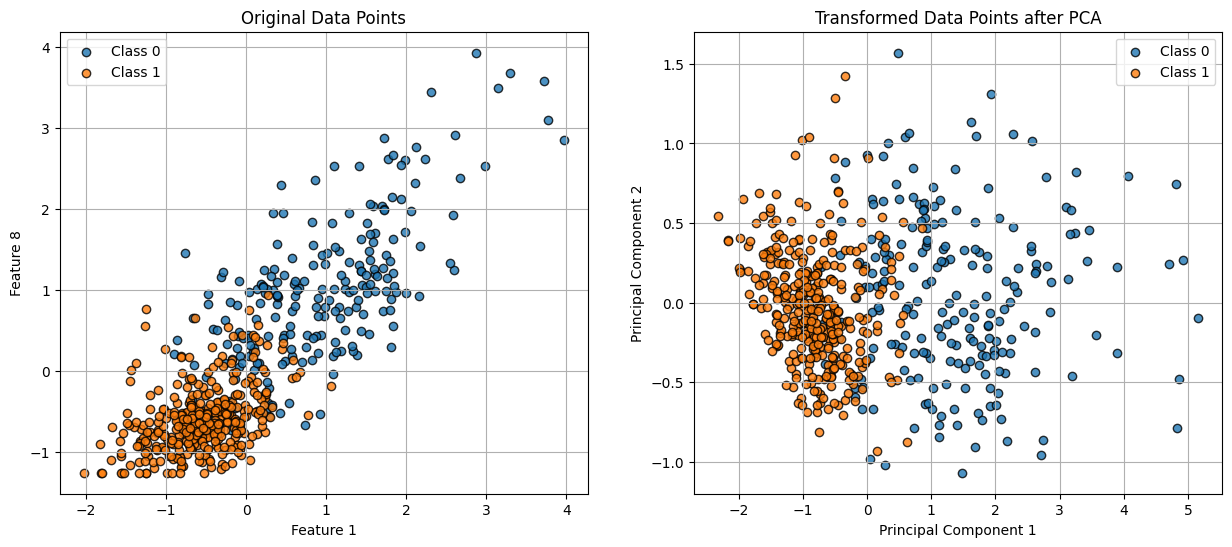

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Select two features for visualization
feature1_index = 0
feature2_index = 7

# Extract the selected features
X_selected = X[:, [feature1_index, feature2_index]]

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_selected)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Plot the original and transformed data points side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the original data points
for label in np.unique(y):
    axs[0].scatter(X_standardized[y == label, 0], X_standardized[y == label, 1], label=f'Class {label}', edgecolor='k', alpha=0.8)
axs[0].set_title('Original Data Points')
axs[0].set_xlabel(f'Feature {feature1_index + 1}')
axs[0].set_ylabel(f'Feature {feature2_index + 1}')
axs[0].legend()
axs[0].grid(True)

# Plot the transformed data points after PCA
for label in np.unique(y):
    axs[1].scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Class {label}', edgecolor='k', alpha=0.8)
axs[1].set_title('Transformed Data Points after PCA')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].legend()
axs[1].grid(True)

plt.show()


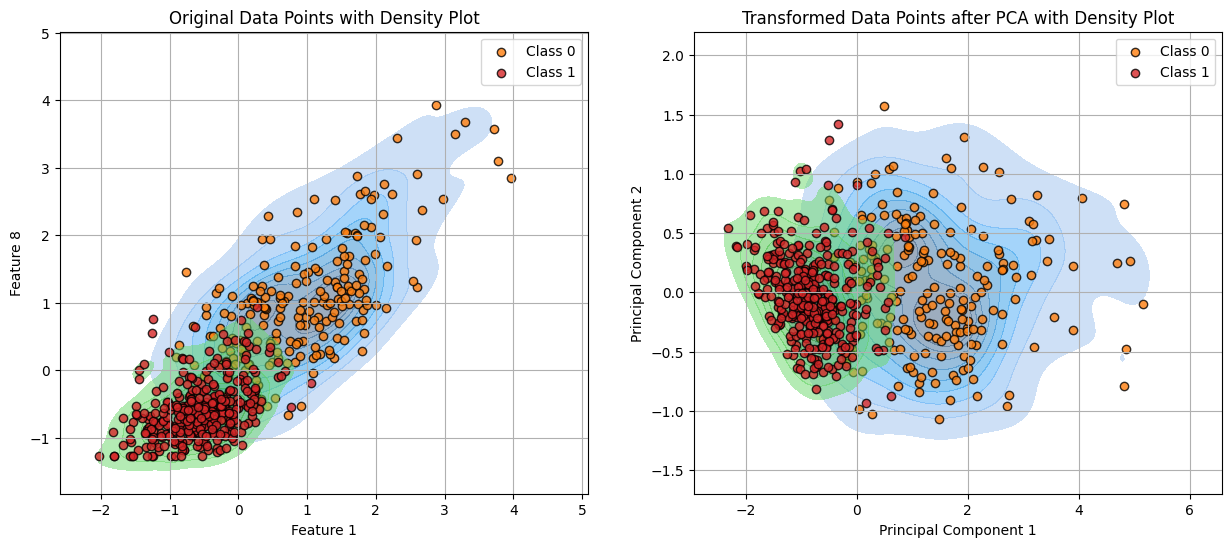

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming X_standardized, X_pca, and y are defined
# feature1_index and feature2_index are assumed to be defined as well

# Convert NumPy arrays to DataFrames
df_standardized = pd.DataFrame(X_standardized, columns=[f'Feature_{i+1}' for i in range(X_standardized.shape[1])])
df_pca = pd.DataFrame(X_pca, columns=['Principal_Component_1', 'Principal_Component_2'])

# Plot the original and transformed data points side by side with density plots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the original data points with density plot
for label in np.unique(y):
    sns.kdeplot(data=df_standardized[y == label], x='Feature_1', y='Feature_2', label=f'Class {label}', ax=axs[0], fill=True, alpha=0.5)
    axs[0].scatter(X_standardized[y == label, 0], X_standardized[y == label, 1], label=f'Class {label}', edgecolor='k', alpha=0.8)
axs[0].set_title('Original Data Points with Density Plot')
axs[0].set_xlabel(f'Feature {feature1_index + 1}')
axs[0].set_ylabel(f'Feature {feature2_index + 1}')
axs[0].legend()
axs[0].grid(True)

# Plot the transformed data points after PCA with density plot
for label in np.unique(y):
    sns.kdeplot(data=df_pca[y == label], x='Principal_Component_1', y='Principal_Component_2', label=f'Class {label}', ax=axs[1], fill=True, alpha=0.5)
    axs[1].scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Class {label}', edgecolor='k', alpha=0.8)
axs[1].set_title('Transformed Data Points after PCA with Density Plot')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].legend()
axs[1].grid(True)

plt.show()


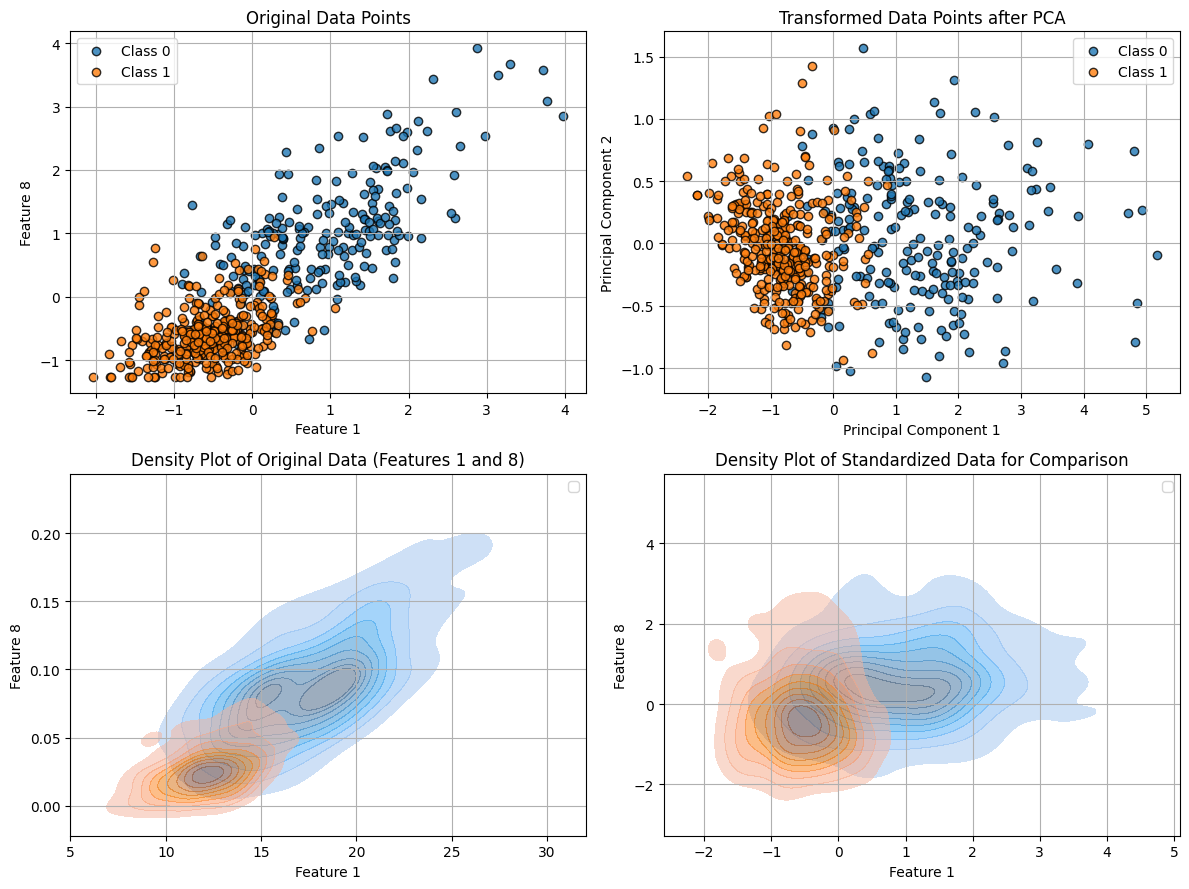

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Select two features for visualization
feature1_index = 0
feature2_index = 7

# Extract the selected features
X_selected = X[:, [feature1_index, feature2_index]]

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_selected)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Convert NumPy arrays to DataFrames
df_original = pd.DataFrame(X_selected, columns=[f'Feature_{i+1}' for i in range(X_selected.shape[1])])
df_standardized = pd.DataFrame(X_standardized, columns=[f'Feature_{i+1}' for i in range(X_standardized.shape[1])])
df_pca = pd.DataFrame(X_pca, columns=['Principal_Component_1', 'Principal_Component_2'])

# Plot the original and transformed data points side by side with density plots
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

# Plot the original data points
for label in np.unique(y):
    axs[0, 0].scatter(X_standardized[y == label, 0], X_standardized[y == label, 1], label=f'Class {label}', edgecolor='k', alpha=0.8)
axs[0, 0].set_title('Original Data Points')
axs[0, 0].set_xlabel(f'Feature {feature1_index + 1}')
axs[0, 0].set_ylabel(f'Feature {feature2_index + 1}')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot the transformed data points after PCA
for label in np.unique(y):
    axs[0, 1].scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Class {label}', edgecolor='k', alpha=0.8)
axs[0, 1].set_title('Transformed Data Points after PCA')
axs[0, 1].set_xlabel('Principal Component 1')
axs[0, 1].set_ylabel('Principal Component 2')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot density plots for original data with both features
for label in np.unique(y):
    sns.kdeplot(data=df_original[y == label], x='Feature_1', y='Feature_2', ax=axs[1, 0], fill=True, alpha=0.5, label=f'Class {label}')
axs[1, 0].set_title('Density Plot of Original Data (Features 1 and 8)')
axs[1, 0].set_xlabel(f'Feature {feature1_index + 1}')
axs[1, 0].set_ylabel(f'Feature {feature2_index + 1}')
axs[1, 0].grid(True)

# Assuming X_original is the original dataset you want to compare
# Define the feature_indices you want to compare
feature_indices = [0, 1]

# Original Data
df_original = pd.DataFrame(X[:, feature_indices], columns=[f'Feature_{i+1}' for i in feature_indices])

# Standardize the data for comparison
scaler_comparison = StandardScaler()
X_standardized_comparison = scaler_comparison.fit_transform(X[:, feature_indices])
df_standardized_comparison = pd.DataFrame(X_standardized_comparison, columns=[f'Feature_{i+1}' for i in feature_indices])

# Plot density plots for standardized data for comparison
for label in np.unique(y):
    sns.kdeplot(data=df_standardized_comparison[y == label], x='Feature_1', y='Feature_2', ax=axs[1, 1], fill=True, alpha=0.5, label=f'Class {label}')
axs[1, 1].set_title('Density Plot of Standardized Data for Comparison')
axs[1, 1].set_xlabel(f'Feature {feature1_index + 1}')
axs[1, 1].set_ylabel(f'Feature {feature2_index + 1}')
axs[1, 1].grid(True)

# Add legends separately
axs[1, 0].legend()
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


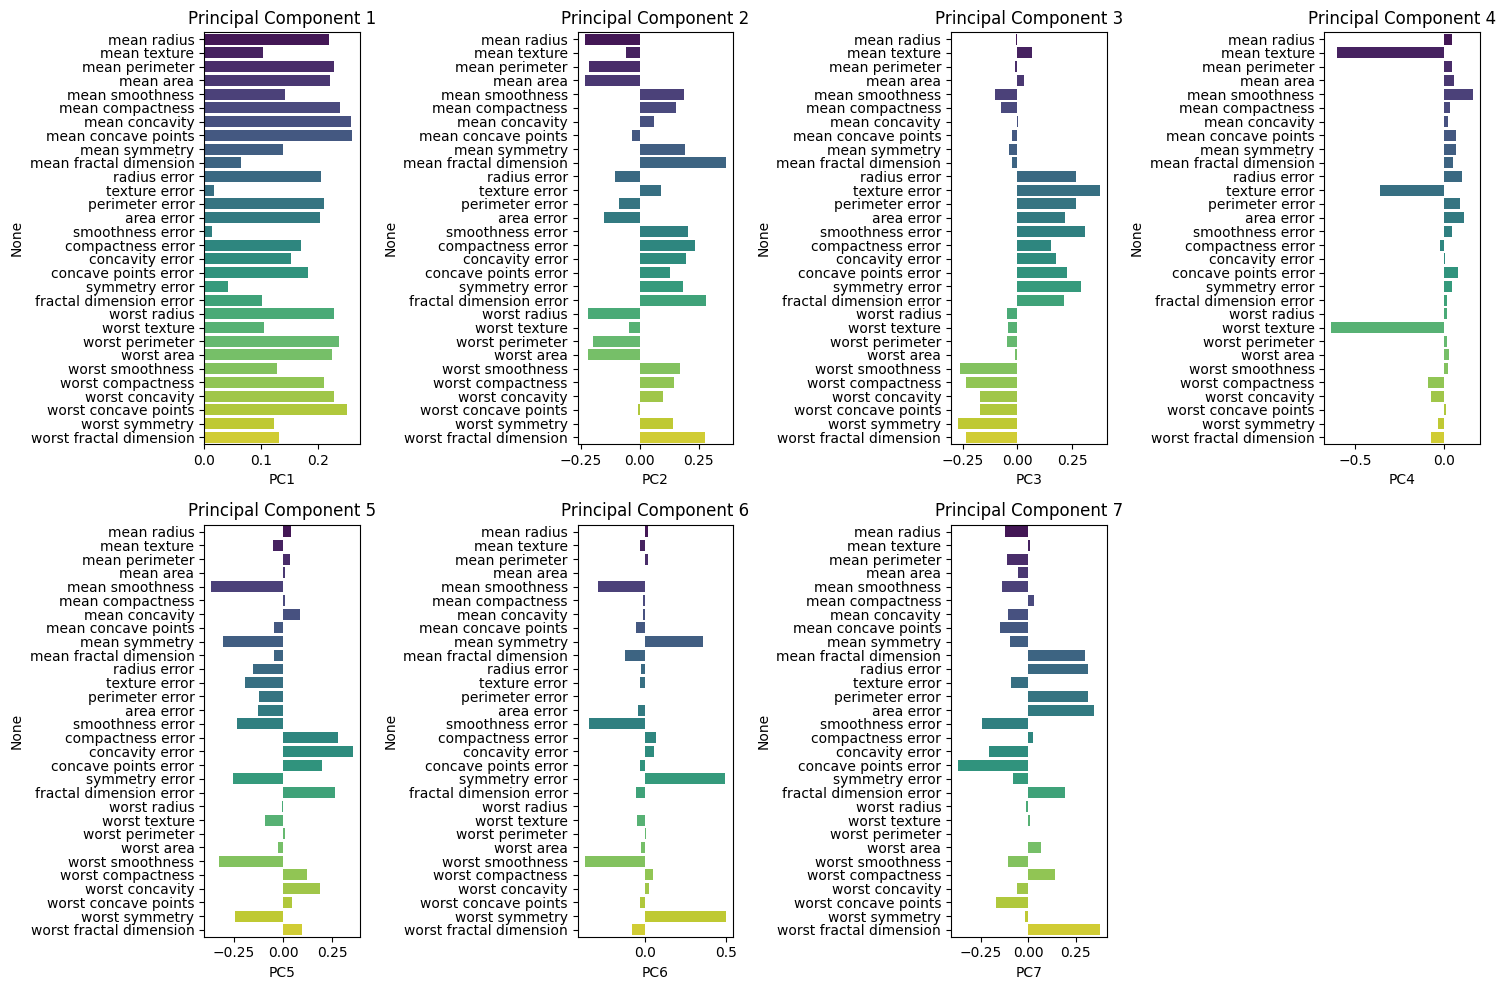

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
feature_names = breast_cancer.feature_names

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Perform PCA with 7 components
num_components = 7
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(X_standardized)

# Create DataFrames for the coefficients of the first 7 principal components
df_coef_pcs = pd.DataFrame(pca.components_[:num_components].T, columns=[f'PC{i+1}' for i in range(num_components)], index=feature_names)

# Bar Plots for the first 7 PCs
plt.figure(figsize=(15, 10))
for i in range(num_components):
    plt.subplot(2, 4, i+1)
    sns.barplot(x=df_coef_pcs[f'PC{i+1}'], y=df_coef_pcs.index, hue=df_coef_pcs.index, palette='viridis', legend=False)
    plt.title(f'Principal Component {i+1}')

plt.tight_layout()
plt.show()


In [ ]:
print(df_coef_pcs)

                              PC1       PC2       PC3       PC4       PC5  \
mean radius              0.218902 -0.233857 -0.008531  0.041409  0.037786   
mean texture             0.103725 -0.059706  0.064550 -0.603050 -0.049469   
mean perimeter           0.227537 -0.215181 -0.009314  0.041983  0.037375   
mean area                0.220995 -0.231077  0.028700  0.053434  0.010331   
mean smoothness          0.142590  0.186113 -0.104292  0.159383 -0.365089   
mean compactness         0.239285  0.151892 -0.074092  0.031795  0.011704   
mean concavity           0.258400  0.060165  0.002734  0.019123  0.086375   
mean concave points      0.260854 -0.034768 -0.025564  0.065336 -0.043861   
mean symmetry            0.138167  0.190349 -0.040240  0.067125 -0.305941   
mean fractal dimension   0.064363  0.366575 -0.022574  0.048587 -0.044424   
radius error             0.205979 -0.105552  0.268481  0.097941 -0.154457   
texture error            0.017428  0.089980  0.374634 -0.359856 -0.191651   

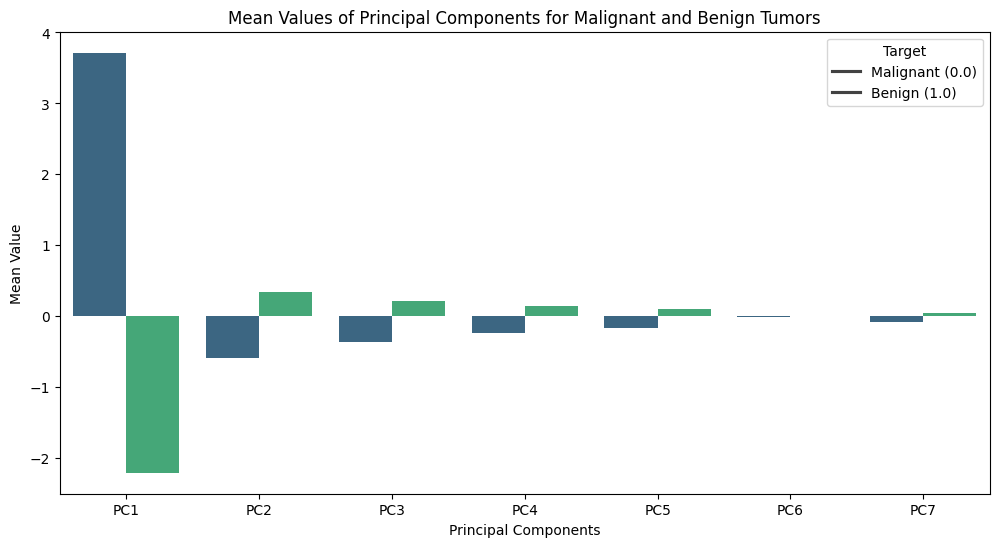

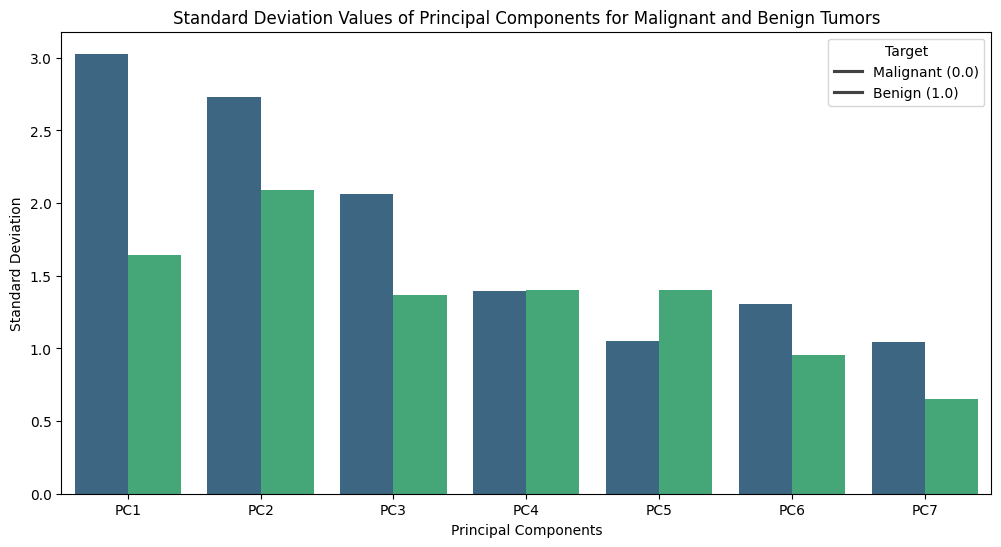

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Perform PCA with 7 components
pca = PCA(n_components=7)
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame combining PCs and target feature
df_pcs = pd.DataFrame(data=np.c_[principal_components, y], columns=[f'PC{i+1}' for i in range(7)] + ['target'])

# Plot bar plot for mean values
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_pcs.groupby('target').mean().stack().reset_index(name='value'),
    x='level_1',
    y='value',
    hue='target',
    palette='viridis'
)
plt.title('Mean Values of Principal Components for Malignant and Benign Tumors')
plt.xlabel('Principal Components')
plt.ylabel('Mean Value')
plt.legend(title='Target', labels=['Malignant (0.0)', 'Benign (1.0)'])
plt.show()

# Plot bar plot for standard deviation values
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_pcs.groupby('target').std().stack().reset_index(name='value'),
    x='level_1',
    y='value',
    hue='target',
    palette='viridis'
)
plt.title('Standard Deviation Values of Principal Components for Malignant and Benign Tumors')
plt.xlabel('Principal Components')
plt.ylabel('Standard Deviation')
plt.legend(title='Target', labels=['Malignant (0.0)', 'Benign (1.0)'])
plt.show()


In [ ]:
print(df_pcs.groupby('target').std().stack().reset_index(name='value'))

    target level_1     value
0      0.0     PC1  3.027726
1      0.0     PC2  2.727339
2      0.0     PC3  2.062148
3      0.0     PC4  1.396315
4      0.0     PC5  1.049931
5      0.0     PC6  1.308907
6      0.0     PC7  1.046815
7      1.0     PC1  1.642301
8      1.0     PC2  2.089287
9      1.0     PC3  1.364279
10     1.0     PC4  1.399497
11     1.0     PC5  1.398517
12     1.0     PC6  0.956062
13     1.0     PC7  0.650495
